<a href="https://colab.research.google.com/github/iamMchoi/Probability-Statistics/blob/master/Ridge_Regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Ridge Regression   
-------------------------

_Authors: Khal Makhoul, W.P.G.Peterson_  

## Project Guide  

--------------------
- [Project Overview](#overview)  
- [Data Review](#data)  
- [Coding Ridge Regression](#code)
- [Ridge Regression in `sklearn`](#sklearn)  

<a id = "overview"></a>
## Project Overview  
-------------
#### EXPECTED TIME 2.5 HRS  

This assignment will test your ability to code your own version of ridge-regularized regression in `Python`. This assignment draws upon and presupposed the knowledge found in the lectures for Week 2. If ever a theoretical questions arises as to "why" we are doing something, please refer back to those lectures.  

The assignment also builds upon the work performed in assignment 1 "*Linear Regression - Least Squares*". The data used will be the same. Though the last assignment tested your ability to read data into `Pandas` from a `.csv`. Those fundamental processes will not be directly tested here.

In coding Ridge Regression you will be asked to:  
- Mean center target variable and mean center / standardize observation  
- Calculate Ridge Regression weights using linear algebra
- Create a  hyperparameter tuning process   

**Motivation**: Ridge Regression offers a way to mitigate some of the weaknesses of Least Squares Linear Regression to build more robust models.  

**Objectives**: This assignmet will -  

- Test `Python` competency and mathematical understandings of Ridge Regression
- Begin to introduce the concept of hyper-parameter tuning  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data**: Data comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

See above link for Description of data.

<a id = "data"></a>  
### Data Exploration

Below provides a review of the "Housing" dataset.

In [0]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
DATA_PATH = "/content/drive/My Drive/AI in Columbia/"
!ls "/content/drive/My Drive/AI in Columbia"

'1W Liner Regression Assignment_1.ipynb'   test.csv
'2W Ridge Regress.ipynb'		   train.csv
 sample_submission.csv			   Untitled0.ipynb


In [0]:
### Read in the data
tr_path =DATA_PATH+"train.csv"
test_path = DATA_PATH+"test.csv"

data = pd.read_csv(tr_path)  

In [0]:
### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
for column in data.columns:                  # Select one colum among columns
  nan_total = data[column].isna().sum()      # Count Nan data
  if nan_total > 0 :
    print(column, nan_total )

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


#### Question 1

In [0]:
### GRADED
### Which column has the most "null" values? assign name as string to ans1.
### ### CAPITALIZATION/SPELLING MATTERS e.g. 'Street' != 'street'
### How many nulls are in that column? assign number as int to ans2
### YOUR ANSWER BELOW

ans1 = 'PoolQC'
ans2 = 1453

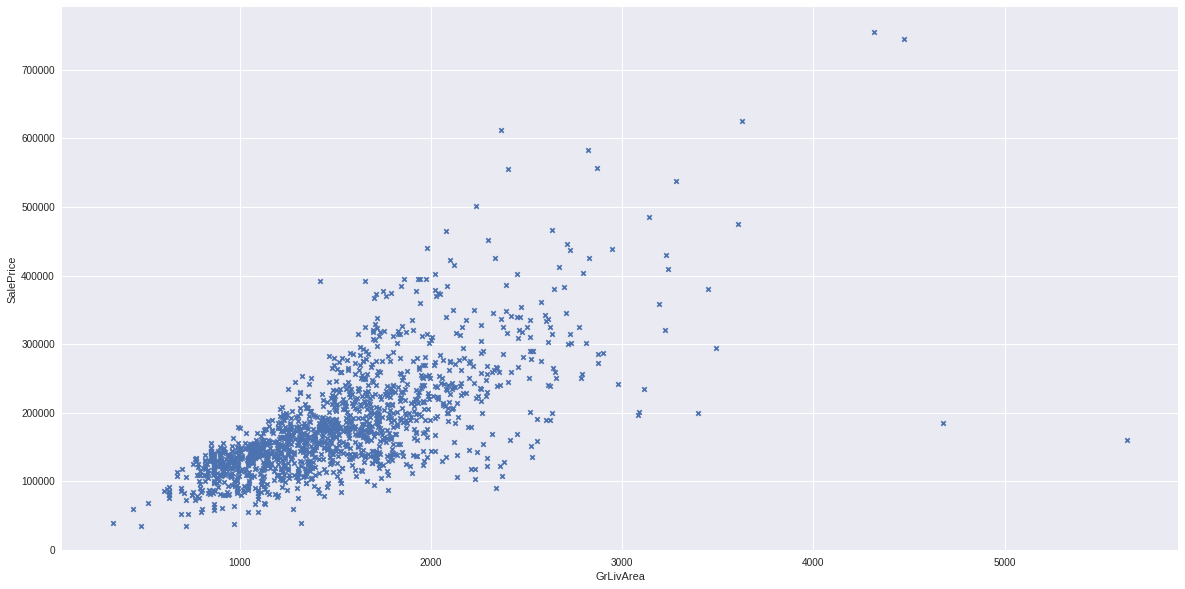

In [0]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

#### Question 2

In [0]:
### GRADED
### In building regressions below, a subset of our data will be used.

### Practice subsetting a DataFrame below.
### Create a DataFrame only containing the "Street" and "Alley" columns from 
### the `data` DataFrame.

### Assign to 'ans1'
### YOUR ANSWER BELOW

ans1 = pd.DataFrame(data[["Street","Alley"]])

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


<a id = "code"></a>
### Coding Ridge Regression   

#### Preprocessing
Before implementing Ridge Regression, it is important to mean-center our target variable and mean-center and standardize observations. We will do this according to the following:  
#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

Where $\bar{X}$ is the sample mean of X and $s_{X}$ is the sample standard deviation of X  

#### Question 3:

In [0]:
### GRADED
### Why are the centering / standardization transformations described above important for ridge regression?
### 'a') Regression works best when values are unitless
### 'b') The transformations makes the regression more interpretable
### 'c') Ridge penalizes large coefficients; the transformations make the coefficients of similar scales
### 'd') It isn't important

### Assign character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'c'

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 4:
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

In [0]:
### GRADED
### Code a function called "standardize" 
### ACCEPT one input, a list of numbers
### RETURN a list where those values have been standardized.

### To standardize, subtract the mean of the list and divide by standard deviation.
### Please use np.std for calculating standard deviation
### YOUR ANSWER BELOW

def standardize( num_list):
    """
    Standardize the given list of numbers
    
    Positional arguments:
        num_list -- a list of numbers
    
    Example:
        num_list = [1,2,3,3,4,4,5,5,5,5,5]
        nl_std = standardize(num_list)
        print(np.round(nl_std,2))
        #--> np.array([-2.11, -1.36, -0.61, -0.61,  
                0.14,  0.14,  0.88,  0.88,  0.88,
                0.88,  0.88])
    """
    
    nl_std = (num_list - np.mean(num_list))/np.std(num_list)
    #nl_std = [(x-mean)/std for x in num_list]     #Reference
    
    return nl_std

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#



Below we will create a function which will preprocess  our data by performing:
* mean subtraction from $y$,
* dimension standardization for $x$.

Both according to the equations set out below.

#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

#### Question 5

In [0]:
def preprocess_for_regularization(data, y_column_name, x_column_names):
    """
    Perform mean subtraction and dimension standardization on data
        
    Positional argument:
        data -- a pandas dataframe of the data to pre-process
        y_column_name -- the name (string) of the column that contains
            the target of the training data.
        x_column_names -- a *list* of the names of columns that contain the
            observations to be standardized
        
    Returns:
        Return a DataFrame consisting only of the columns included
        in `y_column_name` and `x_column_names`.
        Where the y_column has been mean-centered, and the
        x_columns have been mean-centered/standardized.
        
        
    Example:
        data = pd.read_csv(tr_path).head()
        prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
        
        print(prepro_data) #-->
                   GrLivArea  YearBuilt  SalePrice
                0  -0.082772   0.716753     7800.0
                1  -1.590161  -0.089594   -19200.0
                2   0.172946   0.657024    22800.0
                3  -0.059219  -1.911342   -60700.0
                4   1.559205   0.627159    49300.0
    """
    tem_data  = pd.DataFrame()   
    
    tem_data[y_column_name] = data[y_column_name] - np.mean(data[y_column_name])
    
    for x_column_name in x_column_names:
      tem_data[x_column_name] = (data[x_column_name] - np.mean(data[x_column_name]))/np.std(data[x_column_name])

    #---------------------- Reference ----------------------------
    #Create list of all columns
    #toRetCol = x_column_names + [y_column_name]
    
    # Subset dataframe
    #toRet = data[toRetCol].copy() # For "setting with copy" warning
    
    # Calculate mean of y, then subtract from all y's
    #y_mean = np.mean(data[y_column_name])
    #toRet[y_column_name] = data[y_column_name].apply(lambda x: x - y_mean)
    
    # Calc mean and std for every column in x  Then apply standardization
    #for column in x_column_names:
    #  mean = np.mean(data[column])
    #  std = np.std(data[column])
      
    #  toRet[column] = data[column].apply(lambda x: (x - mean)/std)
    #return toRet
    #----------------------------------------------------------------
      
    return tem_data

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Next, you'll implement the equation for ridge regression using the closed form equation:  

$$w_{RR}=(\lambda+X^TX)^{-1}X^Ty$$  

The function will be very similar to the function you wrote for Least Squares Regression with a slightly different matrix to invert.  

NB: Many `numpy` matrix functions will be useful. e.g. `np.matmul`, `np.linalg.inv`, `np.ones`, `np.transpose`, and`np.identity`.

The main change from Least Squares Regression is that $\lambda$ is a parameter *we* must set. This is different from the $w$ parameters that we calculate from either closed form or approximation algorithms.  

We will address tuning parameters such as $\lambda$ in the next section.  

#### Question 6

In [0]:
### GRADED
### Code a function called "ridge_regression_weights"
### ACCEPT three inputs:
### Two matricies corresponding to the x inputs and y target
### and a number (int or float) for the lambda parameter

### RETURN a numpy array of regression weights

### The following must be accomplished:

### Ensure the number of rows of each the X matrix is greater than the number of columns.
### ### If not, transpose the matrix.
### Ultimately, the y input will have length n.
### Thus the x input should be in the shape n-by-p

### *Prepend* an n-by-1 column of ones to the input_x matrix

### Use the above equation to calculate the least squares weights.
### This will involve creating the lambda matrix---
### ### a p+1-by-p+1 matrix with the "lambda_param" on the diagonal
### ### p+1-by-p+1 because of the prepended "ones".

### NB: Pay close attention to the expected format of the returned
### weights. It is different / simplified from Assignment 1.

### YOUR ANSWER BELOW

def ridge_regression_weights(input_x, output_y, lambda_param):
    """Calculate ridge regression least squares weights.
    
    Positional arguments:
        input_x -- 2-d matrix of input data
        output_y -- 1-d numpy array of target values
        lambda_param -- lambda parameter that controls how heavily
            to penalize large weight values
        
    Example:
        training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        lambda_param = 10
        
        rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
        print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
        print(rrw[2]) #--> 31.50189177
        
    Assumptions:
        -- output_y is a vector whose length is the same as the
        number of observations in input_x
        -- lambda_param has a value greater than 0
    """
    # Check shapes of input matricies. If wide and not long, switch
    if input_x.shape[0] < input_x.shape[1]:    #1-by-n case
      input_x = np.transpose(input_x)
      
    # Prepend ones to x matrix
    ones = np.ones((len(output_y), 1), dtype=int)
    augmented_x = np.concatenate((ones, input_x), axis=1) # Add column of ones to X
    
    # Perform linear algebra with numpy      wRR= [X^T / (λ+X^T*X)]*y
    left_multiplier = np.matmul(np.linalg.inv((lambda_param + np.matmul(np.transpose(augmented_x),augmented_x))),np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, output_y)
        
    #---------------------Reference ---------------------    
    # Create square lambda_matrix, with size equal to number of columns in X
    #lambda_matrix = lambda_param * np.identity(min(augmented_x.shape))
    
    # Invert lambda + dot-prod of x and transposed x
    #inv = np.linalg.inv(lambda_matrix + np.matmul(np.transpose(augmented_x), augmented_x))
    
    # dot-prod of inverted matrix and transposed X
    #left_multiplier = np.matmul(inv , np.transpose(augmented_x))
    
    # final dot-prod with the ys
    #weights = np.matmul(left_multiplier, output_y)
    #------------------------------------------------------
      
    
    return w_ls

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Selecting the $\lambda$ parameter

For our final function before looking at the `sklearn` implementation of ridge regression, we will create a hyper-parameter tuning algorithm.  

In ridge regression, we must pick a value for $\lambda$. We have some intuition about $\lambda$ from the equations that define it: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. But the choice of $\lambda$ can motivated with a more precise quantitative treatment.

Eventually, we will look to choose the value of $\lambda$ that minimizes validation error, which we will determine using $k$-fold cross-validation.

For this example here, we will solve a simpler but more problem: Find a value that minimizes the of the list returned by a function.

In [0]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive

def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

Run the above cell and test out the functionality of `hidden`. Remember it takes a single number, between 0 and 50, as an argument

#### Question 7

In [0]:
### GRADED
### Code a function called "minimize"
### ACCEPT one input: a function.

### That function will be similar to `hidden` created above and available for your exploration.
### Like 'hidden', the passed function will take a single argument, a number between 0 and 50 exclusive 
### and then, the function will return a numpy array of 1000 numbers.

### RETURN the value that makes the mean of the array returned by 'passed_func' as close to 0 as possible

### Note, you will almost certainly NOT be able to find the number that makes the mean exactly 0
### YOUR ANSWER BELOW

def minimize( passed_func):
    """
    Find the numeric value that minimizes the output of 'passed_func'
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary, must be close to 43.123985172351)
    
    """
    
    # Create values to test
    test_vals = list(np.linspace(.1,49.9, 1000))
    
    # Find mean of returned array from function
    ret_vals = [abs(np.mean(passed_func(x))) for x in test_vals]
    
    # Find smallest mean
    min_mean = min(ret_vals)
    
    
    #Graph 
    #plt.scatter( test_vals, ret_vals, marker = "x")
    plt.plot(test_vals, ret_vals)
    plt.title(" 1000 test values for lambda between 0.1 and 49.9 ")
    plt.xlabel("Values to Test")
    plt.ylabel("Means from lambda_search_func")
    
    plt.plot(test_vals[ret_vals.index(min_mean)], min(ret_vals),'ro')
    plt.show()
    
    # Return the test value that creates the smallest mean
    return test_vals[ret_vals.index(min_mean)]

  
  

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


The above simulates hyper parameter tuning.  

In the case of ridge regression, you would be searching lambda parameters to minimize validation error.  

The `hidden` function would be analogous to the model building; the returned list analogous to residuals; and the mean of that list analogous to validation error.  

See below for an example of using the functions built above that automatically performs hyper-parameter tuning using mean-absolute-deviation.

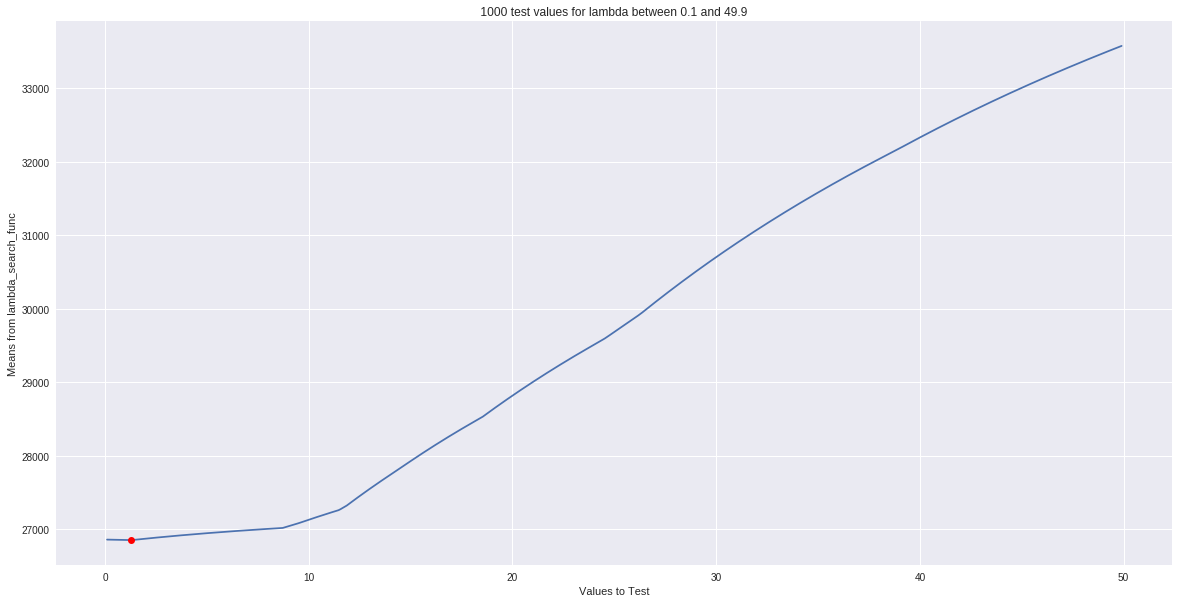

1.2963963963963963

In [0]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 1.4957957957957957

Implementing a k-folds cross-validation strategy will come in later assignments.

#### Question 8

In [0]:
### GRADED
### Why is cross-validation useful?
### 'a') to minimize the liklihood of overfitting
### 'b') Cross-validation allows us to fit on all our data
### 'c') cross-validation standardizes outputs
### 'd') cross-validation is not useful
### assing the character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


<a id = "sklearn"></a>

### Ridge Regression in `sklearn`  

Below gives the syntax for implementing ridge regression in sklearn.

In [0]:
from sklearn.linear_model import Ridge, LinearRegression

### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 100000)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 100000","Ridge, alpha = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")

LeastSquares Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 

Ridge alpha = 100000 Intercept: -1876820.7548806793 Coefs: [ 96.01060155 970.05661101] 

Ridge, alpha = 0 Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 



Note, in the above example, an alpha of 100,000 is set for the ridge regularization. The reason an alpha value this high is required is because standardization / mean centering of our inputs did not occur, and instead of working with inputs on the order of [-4,4] we are on the interval of [0,2000].  

#### Question 9:

In [0]:
### GRADED
### Above, the coefficent around 95/96 corresponds with:
### 'a') Living Area
### 'b') Year Built
### 'c') Sale Price
### Assign character associated with your choice as string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Queston 10:

In [0]:
### GRADED
### True or False:
### A larger "alpha" corresponds to a greater amount of regularization
### assign boolean choice to ans1

ans1 = True

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
